<a href="https://colab.research.google.com/github/vicentcamison/idal_ia3/blob/main/3%20Aprendizaje%20profundo%20(II)/Sesion%202/cnn_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
input_1d = torch.randn(10, dtype=torch.float)
input_2d = torch.randn(2,5, dtype=torch.float)
input_2d_img = torch.randn(3, 10, 3, dtype=torch.float)

In [ ]:
input_2d_img

tensor([[[-0.0544, -0.4868,  2.4613],
         [-1.5481,  1.5498,  1.3548],
         [ 1.4361, -1.0990,  0.7821],
         [ 0.7744, -1.1267, -0.3519],
         [ 0.6887, -0.2963, -2.3854],
         [ 2.4260, -1.0811, -0.2520],
         [ 1.0133, -0.4325,  2.5755],
         [-0.3654,  0.3024,  2.0008],
         [ 0.4906,  0.3306,  0.7618],
         [ 0.5280,  0.4236, -2.0748]],

        [[ 0.3671,  0.1908, -0.4536],
         [-0.2864, -0.2781,  0.7195],
         [ 0.1774,  0.9590, -1.2340],
         [ 0.1827, -1.9651, -1.4165],
         [-0.3403, -0.5598,  0.1680],
         [ 0.1688,  1.7271,  0.3822],
         [ 0.2856,  1.1516,  0.6177],
         [ 1.2140,  2.5443,  0.4420],
         [-0.8987,  0.3699,  1.1989],
         [ 1.2867, -0.1928, -1.4054]],

        [[-0.3557,  1.1903, -0.1732],
         [ 0.1881,  2.0234,  0.5225],
         [-0.1435, -0.1126, -0.6896],
         [ 2.0196,  1.8368, -0.2762],
         [ 0.2629,  0.2415,  2.1507],
         [ 0.1594,  1.1416, -0.5449],
        

In [ ]:
## -- CONV 1D --

input_1d = input_1d.unsqueeze(0).unsqueeze(0)
input_1d.shape

torch.Size([1, 1, 10])

In [ ]:
cnn1d_1 = nn.Conv1d(in_channels=1, out_channels=5, kernel_size=2, stride=2, padding=1)

print('cnn1d_1: \n')
print(cnn1d_1(input_1d).shape, '\n')
print(cnn1d_1(input_1d))

cnn1d_1: 

torch.Size([1, 5, 6]) 

tensor([[[ 0.5096,  0.3993,  0.4346,  0.5027, -0.4903,  1.2785],
         [-0.0844,  0.2502,  0.0338, -0.3273, -1.1764,  0.5537],
         [ 0.2284, -1.3790, -0.4804,  1.0551,  0.1509,  0.9968],
         [ 0.1818,  0.7278,  0.4417, -0.0530,  0.9290, -0.5984],
         [-0.1782, -0.6798, -0.4191,  0.0324, -0.9438,  0.5955]]],
       grad_fn=<SqueezeBackward1>)


In [ ]:
## -- CONV 1D A ENTRADAS 2D --
#También se puede aplicar la convolución 1D a tensores 2D
#lo preparamos primero añadiendo la capa de 'color'

input_2d = input_2d.unsqueeze(0)
input_2d.shape

torch.Size([1, 2, 5])

In [ ]:
cnn1d_5 = nn.Conv1d(in_channels=2, out_channels=1, kernel_size=3, stride=1)

print('cnn1d_5: \n')
print(cnn1d_5(input_2d).shape, '\n')
print(cnn1d_5(input_2d))

#En este caso, está cogiendo lo que normalmente identificamos como el EJE Y,
# como el número de canales de entrada (como si fueran dos colores distintos,
# o incluso interpretado como el resultado de dos filtros 'previos')

cnn1d_5: 

torch.Size([1, 1, 3]) 

tensor([[[ 0.3273, -0.5478,  1.9878]]], grad_fn=<SqueezeBackward1>)


In [ ]:
cnn1d_6 = nn.Conv1d(in_channels=2, out_channels=5, kernel_size=2, stride=2, padding=1)

print('cnn1d_6: \n')
print(cnn1d_6(input_2d).shape, '\n')
print(cnn1d_6(input_2d))

cnn1d_6: 

torch.Size([1, 5, 3]) 

tensor([[[-0.3771,  0.1380, -0.0916],
         [ 0.3593,  0.4794,  1.4011],
         [ 0.3752,  0.3616,  1.0828],
         [-0.1182, -0.2909, -0.7387],
         [ 0.1998, -0.0550, -0.1297]]], grad_fn=<SqueezeBackward1>)


In [ ]:
## -- CONV 2D -- 

# Añadimos una nueva dimensión que (supongo) representa la cantidad
# de datos que tenemos (en este caso, sólo tenemos 1 imágen)

input_2d_img = input_2d_img.unsqueeze(0)
input_2d_img.shape

torch.Size([1, 3, 10, 3])

In [ ]:
# Creamos la capa convolucional
cnn2d_1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1)

print('cnn2d_1: \n')
print(cnn2d_1(input_2d_img).shape, '\n')
print(cnn2d_1(input_2d_img))

cnn2d_1: 

torch.Size([1, 3, 8, 1]) 

tensor([[[[-0.0967],
          [ 0.8574],
          [-0.3754],
          [ 0.5634],
          [ 0.8096],
          [-0.9046],
          [-1.0489],
          [ 0.7761]],

         [[-0.6125],
          [ 0.6857],
          [ 0.5271],
          [ 0.4835],
          [ 0.0284],
          [ 0.1551],
          [-0.1700],
          [-0.8534]],

         [[ 0.0723],
          [-1.3686],
          [-0.1435],
          [-0.3495],
          [ 0.1465],
          [ 0.2665],
          [ 0.0450],
          [ 0.5455]]]], grad_fn=<ThnnConv2DBackward>)


In [ ]:
cnn2d_2 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=2, padding=1)

print('cnn2d_2 \n')
print(cnn2d_2(input_2d_img).shape, '\n')
print(cnn2d_2(input_2d_img))

cnn2d_2 

torch.Size([1, 5, 11, 4]) 

tensor([[[[ 0.1813,  0.5050,  0.5328, -0.3988],
          [ 0.1293,  0.8883,  0.4461,  0.0829],
          [ 0.4657,  0.0246,  0.4771, -0.4220],
          [ 0.5573,  0.4396, -0.1813,  0.0985],
          [ 0.1421,  0.5485,  1.6716,  1.4015],
          [ 0.2979,  0.4425,  1.3544,  0.7910],
          [ 0.2209,  0.1290,  0.2060, -0.5830],
          [ 0.1161,  0.7448,  0.2340, -0.2863],
          [ 0.3559, -0.3338, -0.9009,  0.3169],
          [ 0.9924,  1.0399, -0.4414, -0.0427],
          [ 0.1183,  0.3562,  0.4301,  0.8160]],

         [[-0.2333, -0.7368,  0.2523,  0.3719],
          [-0.4786, -0.7825,  0.4459,  0.1981],
          [-0.0045, -0.9896, -0.6864,  0.3838],
          [-0.5478,  0.0484,  0.7064, -0.2305],
          [-0.6595, -0.3192, -1.6534, -0.8798],
          [ 0.0457, -0.2774, -1.3361, -0.9987],
          [-0.4069,  0.0507,  0.0585,  0.1578],
          [-0.5669, -0.4883, -0.5090,  1.0434],
          [-0.2870,  0.5944,  0.1810, -0.3421],


# RED CONVOLUCIONAL DE CLASIFICACIÓN DE IMÁGENES CIFAR-10

In [ ]:
#preparamos la nueva normalziación de la imagen: de [0, 1] a [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
#Descargamos los conjuntos necesarios para train y test
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


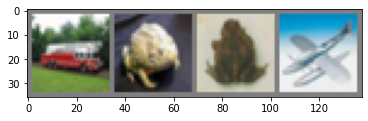

truck  frog  frog plane


In [ ]:
#Probemos a montar un código encargado de mostrar algunas imágenes

def imshow(img):
  img = img / 2 + 0.5 # desnormalización de la imágen
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

#Cogemos un conjunto de imágenes
dataiter = iter(trainloader) #generamos el iterador
images, labels = dataiter.next()

#Mostramos las imágenes
imshow(torchvision.utils.make_grid(images))
#Mostramos las labels
print(' '.join('%5s' % classes[labels[j]] for j in range(labels.size(0))))

In [ ]:
# Definimos la CNN

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5) #creo que esto era equivalente a un flatten
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [ ]:
#para copiar los pesos a a memoria de la GPU para realizar los cálculos,
# necesitamos esta línea de código

net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
#LOSS FUNCTION Y OPTIMIZADOR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
#ENTRENAMIENTO

#el comportamiento de algunas capas no es el mismo en entrenamiento o en test,
# (como por ejemplo, dropout o batch normalization), es interesante definirlo
net.train()

train_loss = []
epochs = 10
for epoch in range(epochs):

  running_loss = 0.0
  for data in trainloader: #este es el iterable que se ha construido unas celdas atrás
    # cogemos los inputas, que vienen en formato [input, label]
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    #hacemos cero los parámetros del gradiente
    # PyTorch acumula los gradientes en pasadas backward sucesivas
    optimizer.zero_grad()
    # forward + backward + optimizar
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    #el loss se devuelve como una media sobre todo el batch_size: deshacemos la media
    running_loss += loss.item() * inputs.size(0)

  loss = running_loss / len(trainloader) #media sobre el número de batches
  # esto ha servido para evitar el sesgo en el cálculo del loss para el último batch
  train_loss.append(loss)
  print('epoch [%d/%d] loss: %.3f' %
        (epoch + 1, epochs, loss))
  
print('Finished Training')

epoch [1/10] loss: 6.824
epoch [2/10] loss: 5.318
epoch [3/10] loss: 4.769
epoch [4/10] loss: 4.404
epoch [5/10] loss: 4.140
epoch [6/10] loss: 3.921
epoch [7/10] loss: 3.747
epoch [8/10] loss: 3.585
epoch [9/10] loss: 3.447
epoch [10/10] loss: 3.333
Finished Training


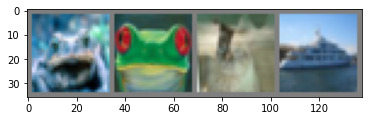

GroundTruth:   frog  frog   cat  ship


In [ ]:
#  --Veamos si nuestra CNN ha aprendido usando otro batch de imagenes--

images, labels = dataiter.next()

#printeamos las imágenes
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(labels.size(0))))

In [ ]:
#  --Predicción para 4 imágenes--
images, labels = images.to(device), labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1) #CLASIFICACIÓN
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(predicted.size(0))))

Predicted:   frog  frog   cat  ship


In [ ]:
#  --Tasa de acierto para todo el test set--

net.eval()
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10.000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10.000 test images: 64 %


In [ ]:
# -- TASAS DE ACIERTO POR CLASE --
# Veamos qué clases se detectan mejor

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

#todo lo que está dentro del 'with' no calcula el gradiente
# es importante usarlo para no llenar la memoria de la gpu de cosas que no sirven pa na
with torch.no_grad():
  for data in testloader:
    images, labels = dataimages, labels = images.to(device), labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    #ahora no sólo nos interesa la tasa de acierto global, sino que tenemos que
    # ver además de qué clase se trata
    for i in range(labels.size(0)):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (
      classes[i], 100 * class_correct[i] / class_total[i]))

ZeroDivisionError: ignored

# Cuestiones
1.   ¿Cuál es el speed-up alcanzado al usar la GPU frente a CPU? Interpreta el resultado
2.   Trata de aumentar el ancho de la red (2º argumento de la primera nn.Conv2d y 1º argumento de la segunda nn.Conv2d). ¿Cömo varía el speed-up respecto al caso anterior?
3.   Intenta definir la misma red CNN de manera secuencial